In [225]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

Path.cwd()

PosixPath('/home/francesco/FisMedLab/Spettroscopiagamma')

In [226]:
Cs137cal = np.loadtxt('Cs137cal2.Spe')
Ba133cal = np.loadtxt('Ba133cal.Spe')
Am241cal = np.loadtxt('Am241cal.Spe')
Co60cal = np.loadtxt('Co60cal.Spe')
Na22cal = np.loadtxt('Na22cal.Spe')

back=np.loadtxt('fondo.Spe')


In [227]:

def calculate_chi_square(y_observed, y_expected, uncertainties):
    residuals = y_observed - y_expected
    chi_square = np.sum((residuals / uncertainties) ** 2)
    return chi_square

In [228]:
x=np.linspace(1,2048,2048)

#NORMALIZZO TUTTO
Cs137cal_norm= Cs137cal / (np.max(Cs137cal)*770)
Ba133cal_norm= Ba133cal /( np.max(Ba133cal)*564)
Co60cal_norm= Co60cal / (np.max(Co60cal)*2230)
Am241cal_norm= Am241cal / (np.max(Am241cal)*102)
Na22cal_norm= Na22cal / (np.max(Na22cal)*2063)

back_norm= back / (np.max(back)*92163)

Cs137clean=Cs137cal_norm-back_norm
Am241clean=Am241cal_norm-back_norm
Co60clean=Co60cal_norm-back_norm
Ba133clean=Ba133cal_norm-back_norm
Na22clean=Na22cal_norm-back_norm


E=[]
dE=[]
s=[]
ds=[]
cov12=[]

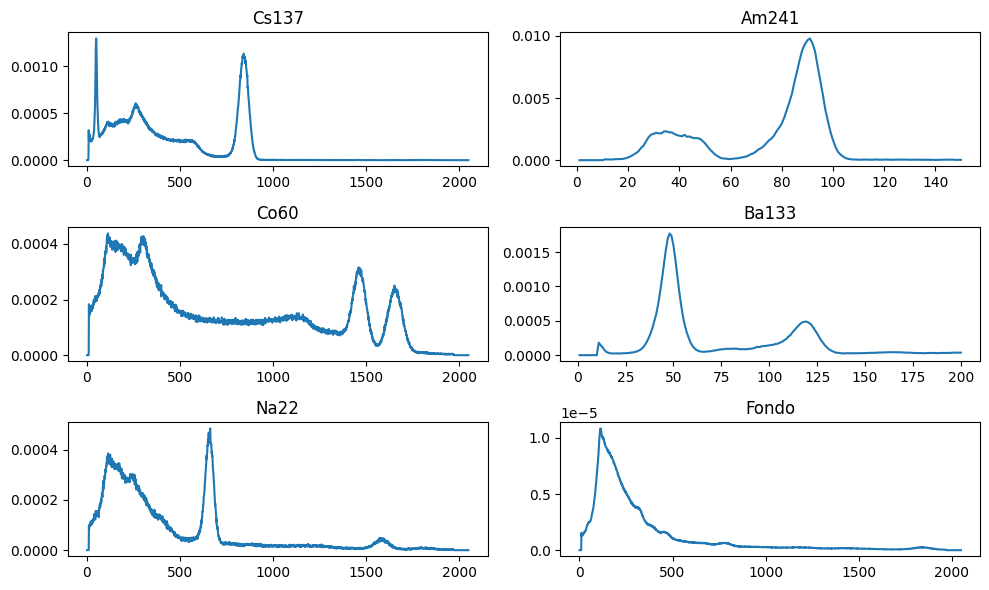

In [229]:
fig, ax=plt.subplots(3,2,figsize=(10,6))
ax[0,0].plot(x,Cs137clean)
ax[0,0].set_title('Cs137')
ax[0,1].plot(x[0:150],Am241clean[0:150])
ax[0,1].set_title('Am241')
ax[1,0].plot(x,Co60clean)
ax[1,0].set_title('Co60')
ax[1,1].plot(x[0:200],Ba133clean[0:200])
ax[1,1].set_title('Ba133')
ax[2,0].plot(x,Na22clean)
ax[2,0].set_title('Na22')
ax[2,1].plot(x,back_norm)
ax[2,1].set_title('Fondo')
plt.tight_layout()

Americio

/tmp/ipykernel_64124/778785841.py:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


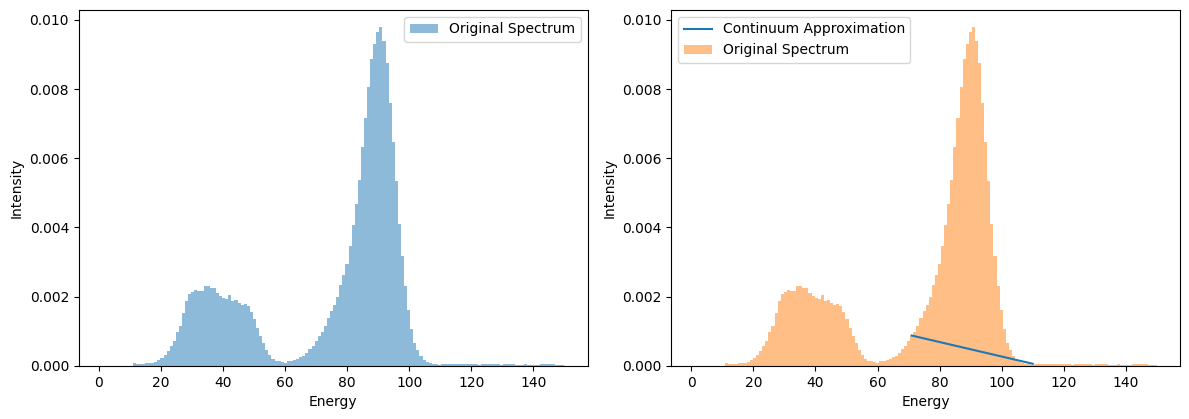

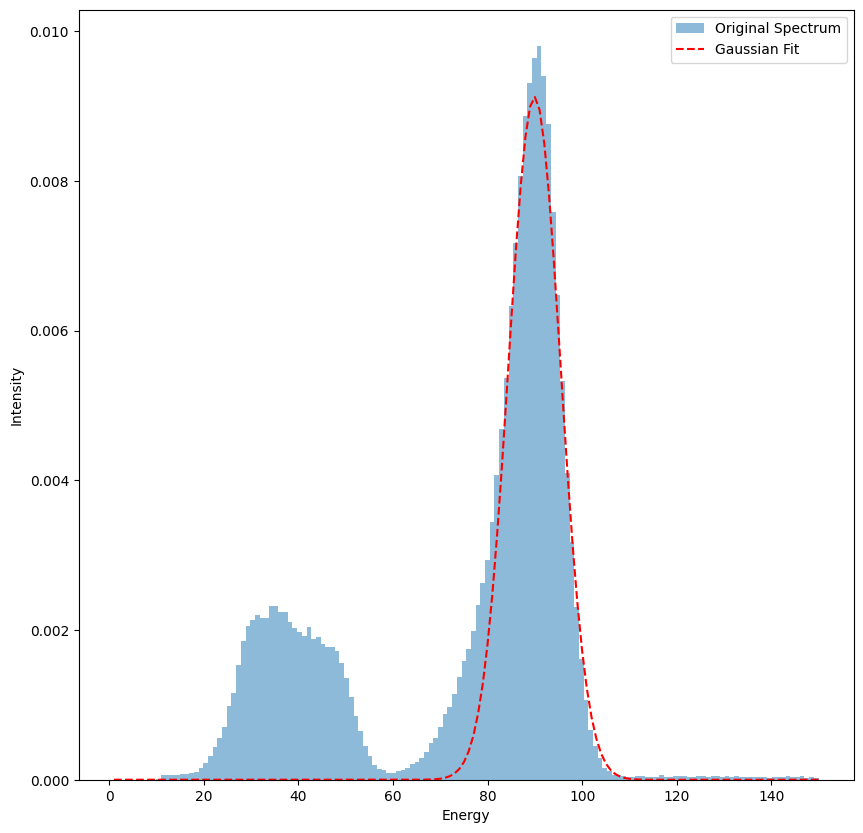

[89.92436829]
[0.05064579]
[5.51902955]
[0.05064579]


In [230]:
x=np.linspace(1,2048,2048)

x=x[0:150]
energy=x
Am241clean=Am241clean[0:150]
intensity=Am241clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 70
Cb_index = 110

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)

E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])

plt.figure(figsize=(12, 8))
plt.title('Am241')

plt.subplot(2, 2, 1)
plt.hist(energy, weights=intensity,alpha=0.5, label='Original Spectrum',bins=len(energy))
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.hist(energy, weights=intensity,alpha=0.5, label='Original Spectrum',bins=len(energy))
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.hist(energy, weights=intensity,alpha=0.5, label='Original Spectrum',bins=len(energy))
plt.plot(energy, gaussian_fit, label='Gaussian Fit',linestyle='--',color='red')

plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()


print(E)
print(dE)
print(s)
print(ds)



Cobalto

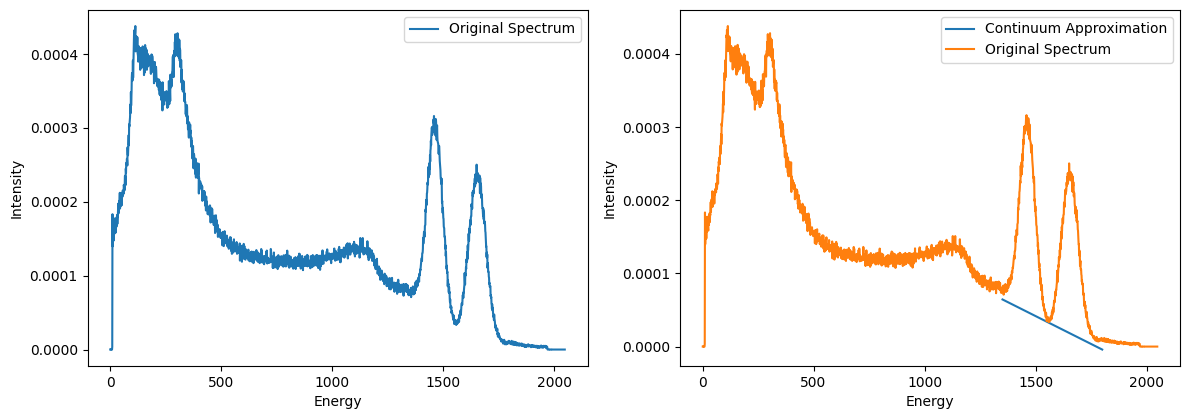

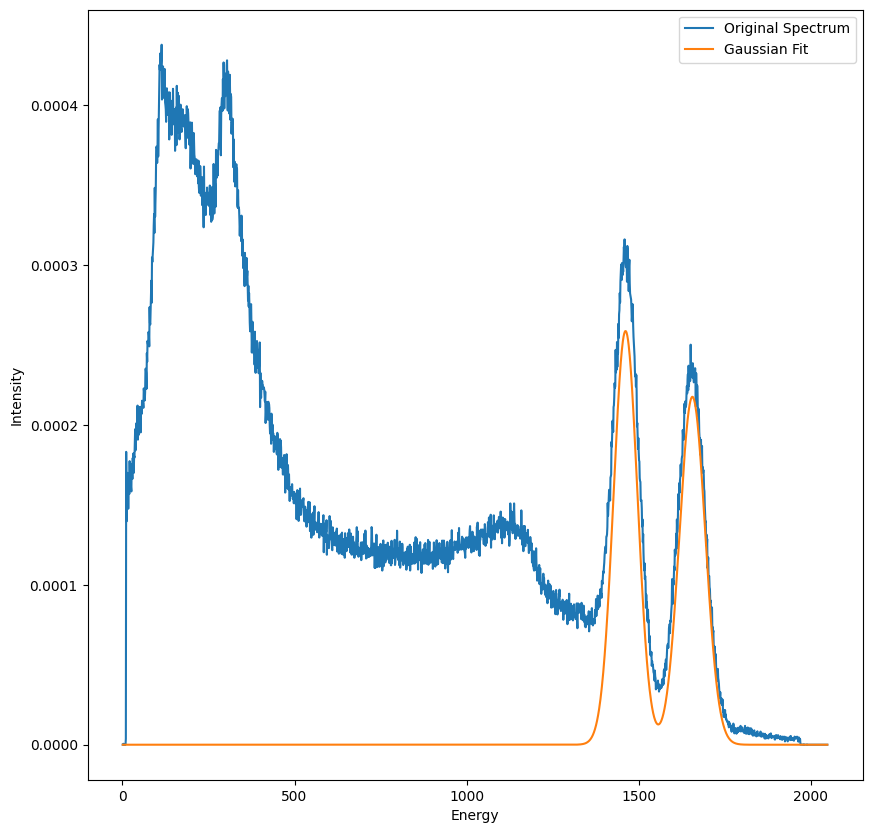

[  89.92436829 1461.7392378  1656.04088095]
[0.05064579 0.08237002 0.10198485]
[ 5.51902955 34.65261043 37.5802619 ]
[0.05064579 0.08249102 0.10214364]


In [231]:
x=np.linspace(1,2048,2048)

energy=x
Co60clean=Co60clean
intensity=Co60clean


def gaussian(x, amplitude1, mean1, stddev1, amplitude2, mean2, stddev2):
    return amplitude1 * np.exp(-(x - mean1)**2 / (2 * stddev1**2)) + amplitude2 * np.exp(-(x - mean2)**2 / (2 * stddev2**2))

Ca_index = 1350
Cb_index = 1800

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = (Ca_intensity-0.000015) + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [0.0003, 1450, 20,0.00028,1600,20]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit1, mean_fit1, stddev_fit1,amplitude_fit2,mean_fit2,stddev_fit2 = fit_params
gaussian_fit = gaussian(energy, amplitude_fit1, mean_fit1, stddev_fit1,amplitude_fit2,mean_fit2,stddev_fit2)

E=np.append(E,mean_fit1)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit1)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])


E=np.append(E,mean_fit2)
dE=np.append(dE,np.sqrt(cov[4,4]))
s=np.append(s,stddev_fit2)
ds=np.append(ds,np.sqrt(cov[5,5]))
cov12=np.append(cov12,cov[4,5])





plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()


print(E)
print(dE)
print(s)
print(ds)

Cesio

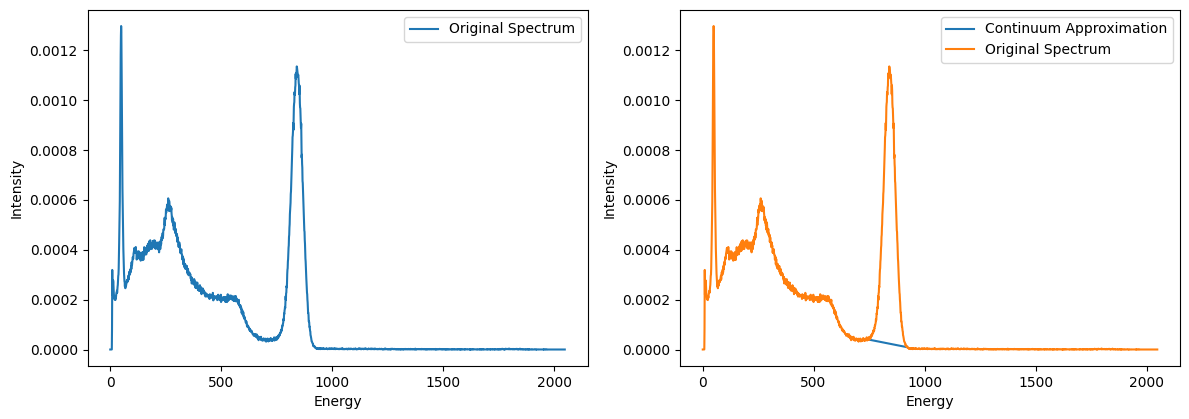

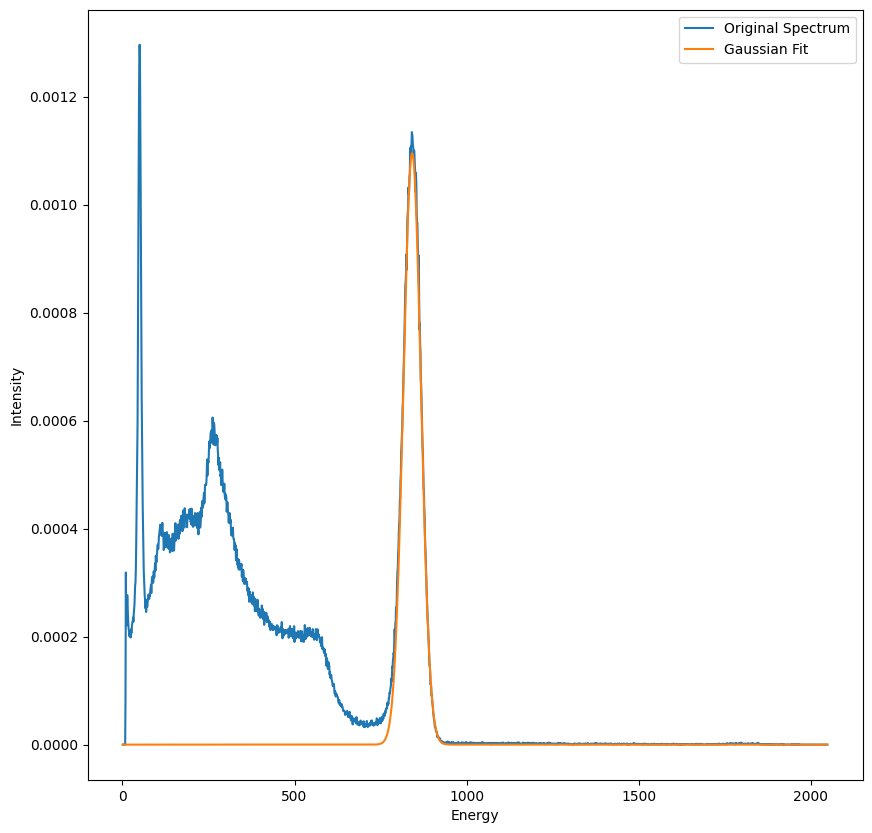

[  89.92436829 1461.7392378  1656.04088095  841.84676362]
[0.05064579 0.08237002 0.10198485 0.02200186]
[ 5.51902955 34.65261043 37.5802619  25.51456172]
[0.05064579 0.08249102 0.10214364 0.02200186]


In [232]:
x=np.linspace(1,2048,2048)


energy=x
Cs137clean=Cs137clean
intensity=Cs137clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 750
Cb_index = 920

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)


E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()


print(E)
print(dE)
print(s)
print(ds)

Sodio

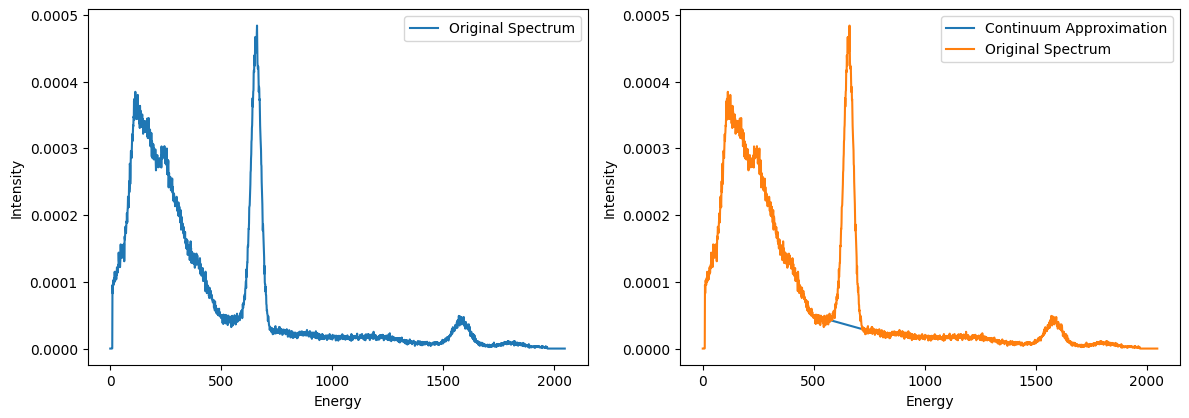

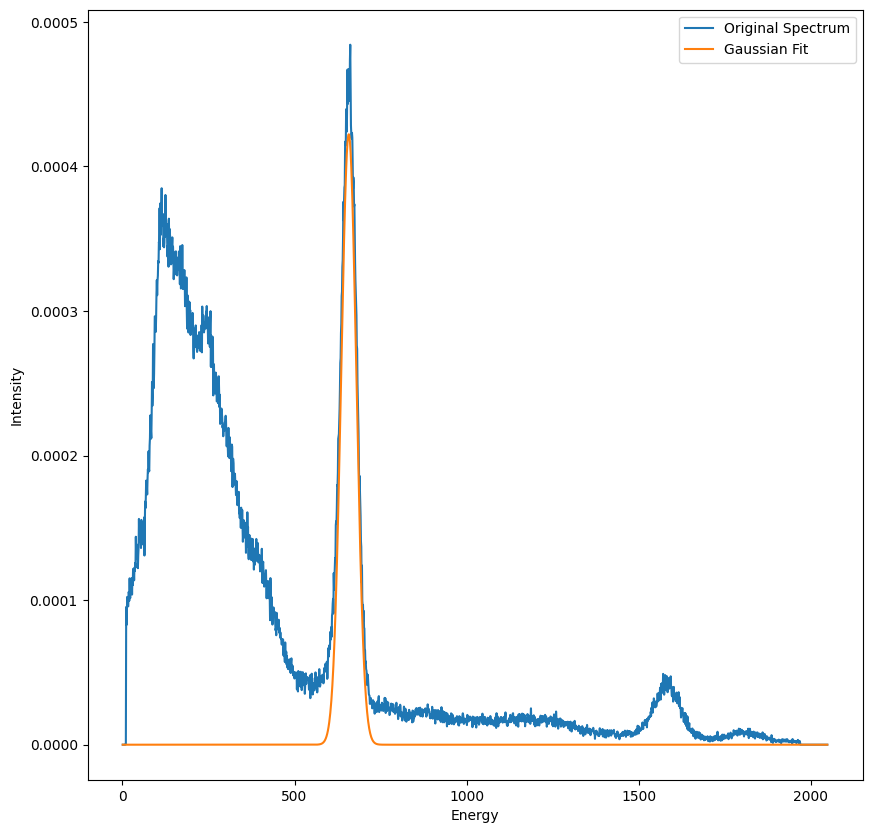

[  89.92436829 1461.7392378  1656.04088095  841.84676362  657.61653476]
[0.05064579 0.08237002 0.10198485 0.02200186 0.03130037]
[ 5.51902955 34.65261043 37.5802619  25.51456172 22.05908146]
[0.05064579 0.08249102 0.10214364 0.02200186 0.03130037]


In [233]:
x=np.linspace(1,2048,2048)


x=x
energy=x
Na22clean=Na22clean
intensity=Na22clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 500
Cb_index = 750

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)


E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

print(E)
print(dE)
print(s)
print(ds)

Sodio picco 2

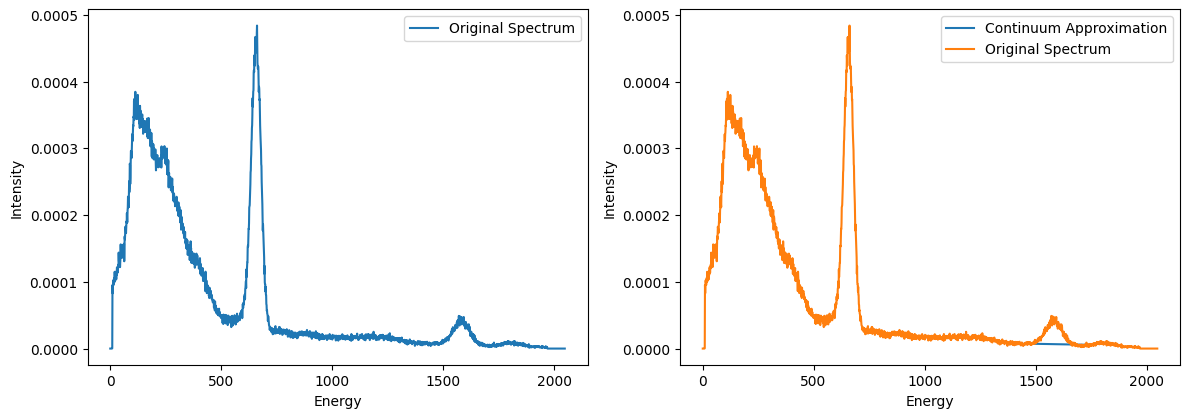

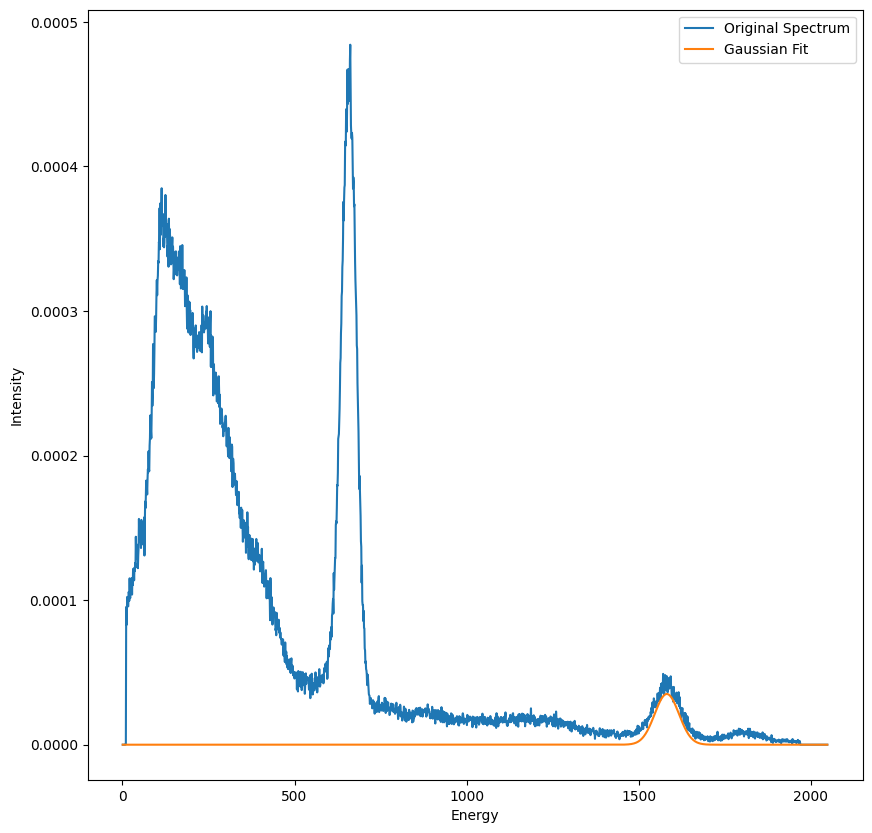

[  89.92436829 1461.7392378  1656.04088095  841.84676362  657.61653476
 1581.77911137]
[0.05064579 0.08237002 0.10198485 0.02200186 0.03130037 0.16696826]
[ 5.51902955 34.65261043 37.5802619  25.51456172 22.05908146 35.22294104]
[0.05064579 0.08249102 0.10214364 0.02200186 0.03130037 0.16696826]


In [234]:
x=np.linspace(1,2048,2048)


x=x
energy=x
Na22clean=Na22clean
intensity=Na22clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 1450
Cb_index = 1750

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)


E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

print(E)
print(dE)
print(s)
print(ds)

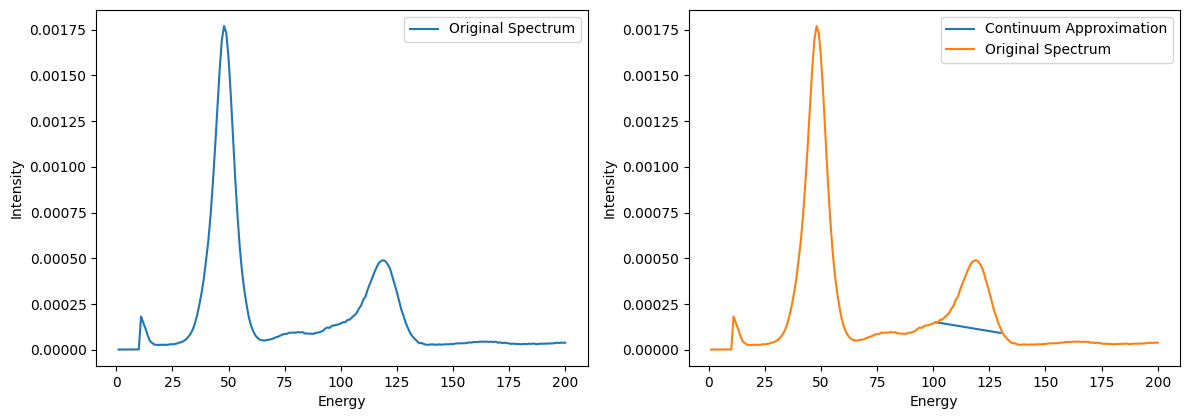

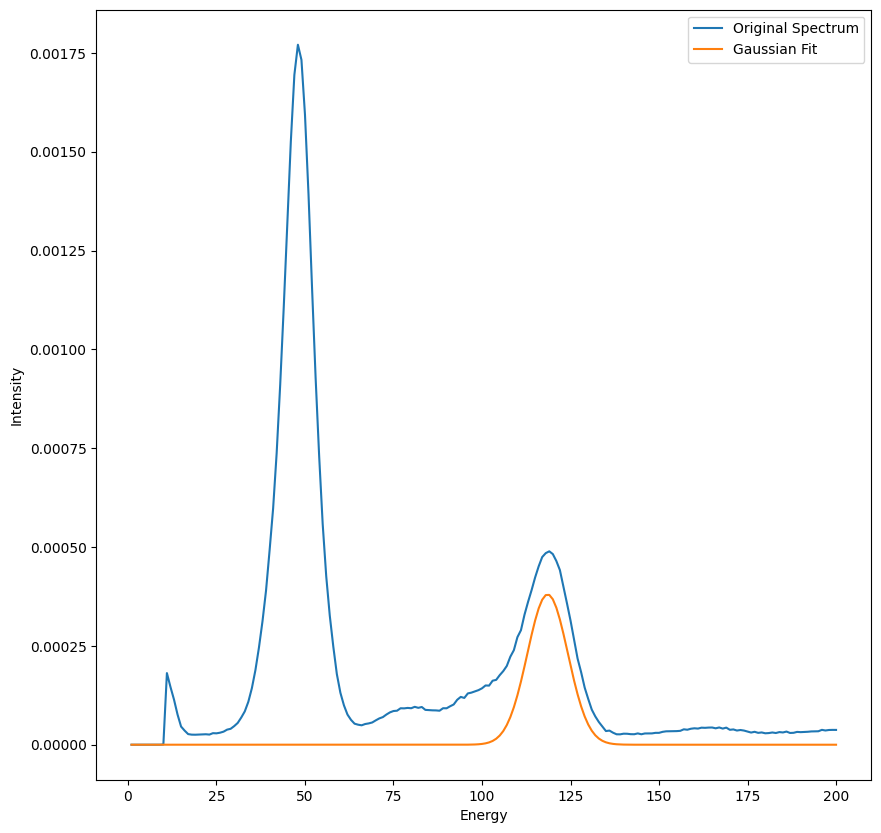

[  89.92436829 1461.7392378  1656.04088095  841.84676362  657.61653476
 1581.77911137  118.53622426]
[0.05064579 0.08237002 0.10198485 0.02200186 0.03130037 0.16696826
 0.03740932]
[ 5.51902955 34.65261043 37.5802619  25.51456172 22.05908146 35.22294104
  5.72293667]
[0.05064579 0.08249102 0.10214364 0.02200186 0.03130037 0.16696826
 0.03740932]


In [235]:
x=np.linspace(1,2048,2048)


x=x[0:200]
energy=x
Ba133clean=Ba133clean[0:200]
intensity=Ba133clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 100
Cb_index = 130

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)


E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()


print(E)
print(dE)
print(s)
print(ds)

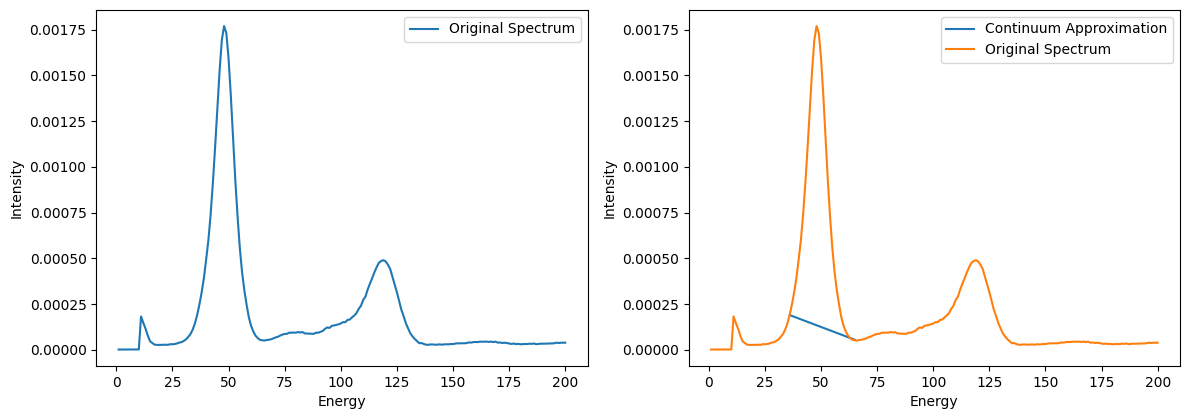

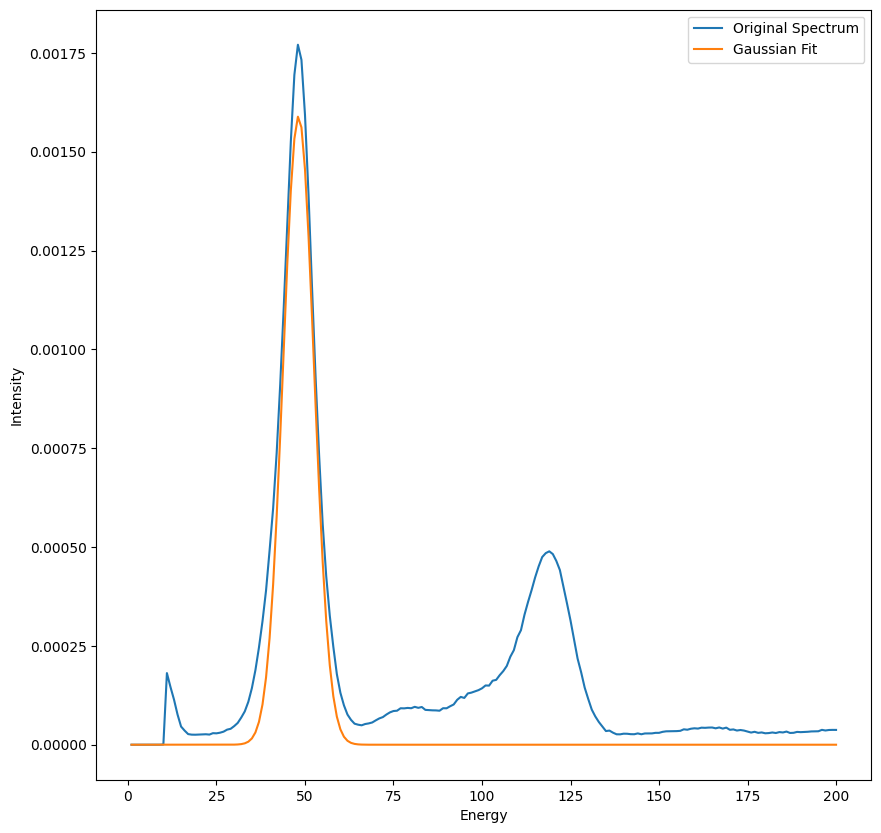

[  89.92436829 1461.7392378  1656.04088095  841.84676362  657.61653476
 1581.77911137  118.53622426   48.17678629]
[0.05064579 0.08237002 0.10198485 0.02200186 0.03130037 0.16696826
 0.03740932 0.01586921]
[ 5.51902955 34.65261043 37.5802619  25.51456172 22.05908146 35.22294104
  5.72293667  4.34043149]
[0.05064579 0.08249102 0.10214364 0.02200186 0.03130037 0.16696826
 0.03740932 0.01586921]


In [236]:
x=np.linspace(1,2048,2048)


x=x[0:200]
energy=x
Ba133clean=Ba133clean[0:200]
intensity=Ba133clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 35
Cb_index = 65

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)


E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()


print(E)
print(dE)
print(s)
print(ds)

TO do :
Linearità ale e basse energie
Calibrazione
Risoluzione

Calibration

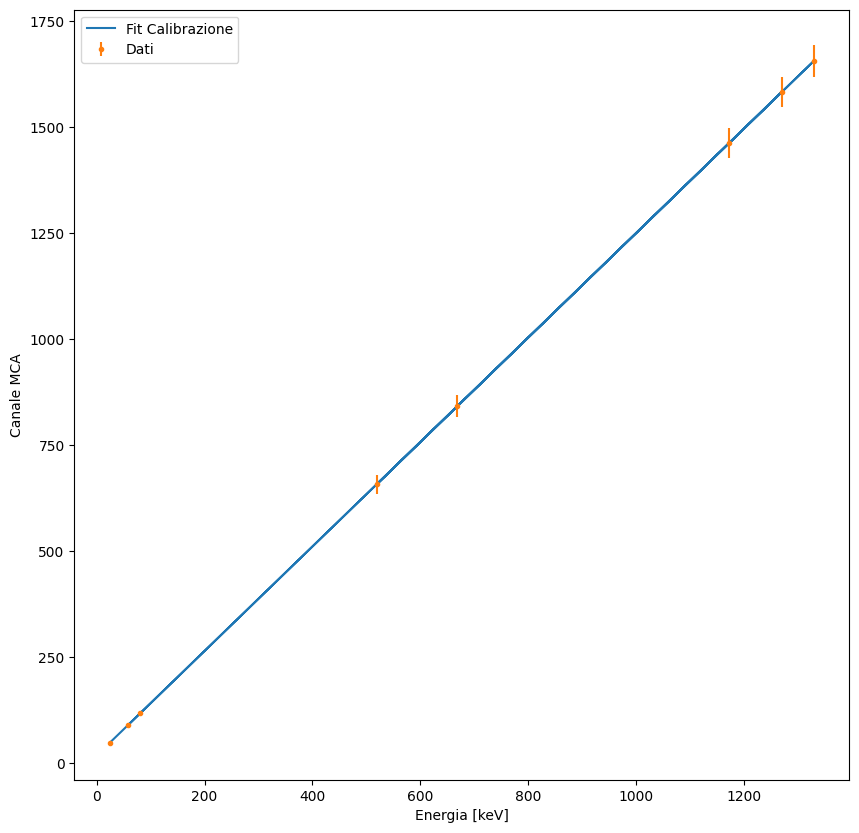

Chi-squared: 2.96
Reduced chi-squared: 0.49
Energia Calibrata :  [  57.88168729 1172.62983238 1330.52095975  668.90006453  519.19305197
 1270.17522963   81.13191885   23.95725577]
Errore Energia Calibrata:   [ 4.48480921 28.15899875 30.53803263 20.73334455 17.92539262 28.62245414
  4.65050582  3.52707064]
[  0.8126083 -15.1916005]
[3.12123075e-03 3.22613565e+00]


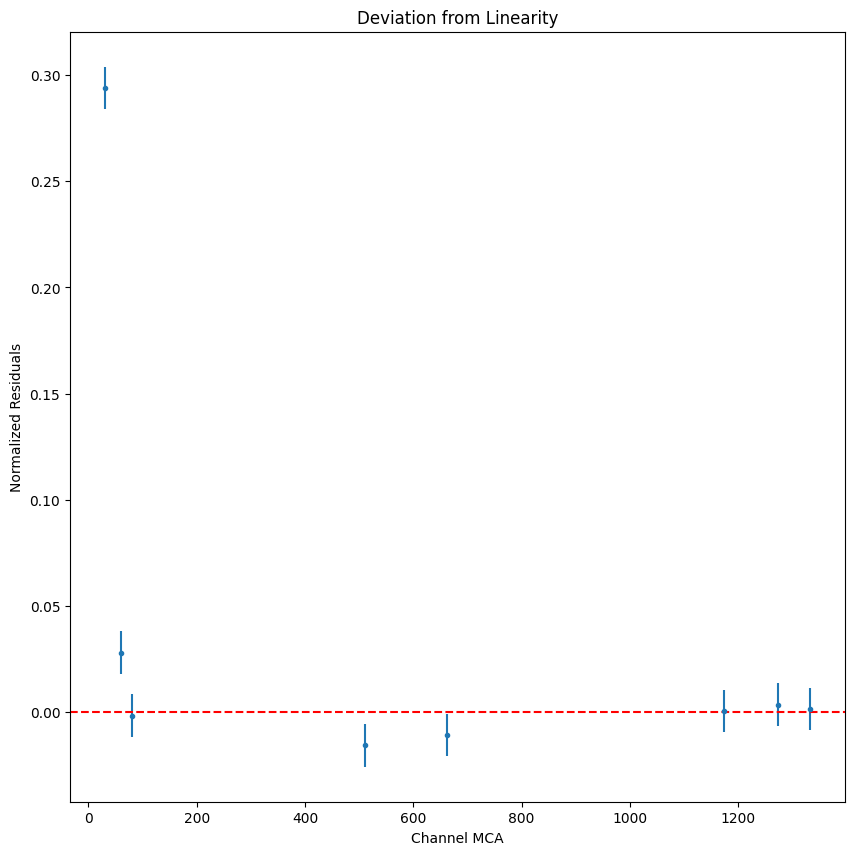

In [237]:
E_id=[59.5,1173.2,1332.5,661.66,511,1274.54,80.99,31]

errperc=s/E

def linear(x,m,q):
    return m*x+q




popt1,covt=curve_fit(linear,E,E_id,absolute_sigma=False) 

plt.plot(linear(E,*popt1),E,label='Fit Calibrazione')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Canale MCA')

plt.errorbar(linear(E,*popt1),E,yerr=s,fmt='.',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = E_id - linear(E,*popt1)
chi2 = np.sum((residuals / s) ** 2)
dof = len(E) - len(popt1)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',linear(E,*popt1))
print('Errore Energia Calibrata:  ',s*popt1[0])
#print('Errore Energia Calibrata:  ',R_E*linear(E,*popt1))
#
#print('Errore Risoluzione : ',errRes)
residuals = (E_id - linear(E, *popt1)) / linear(E, *popt1)

print(popt1)
print(np.sqrt(np.diag(covt)))
Ecal=np.array(linear(E,*popt1))

# Plot the normalized residuals
plt.errorbar(E_id, residuals,yerr=0.01, fmt='.')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Channel MCA')
plt.ylabel('Normalized Residuals')
plt.title('Deviation from Linearity')
plt.show()

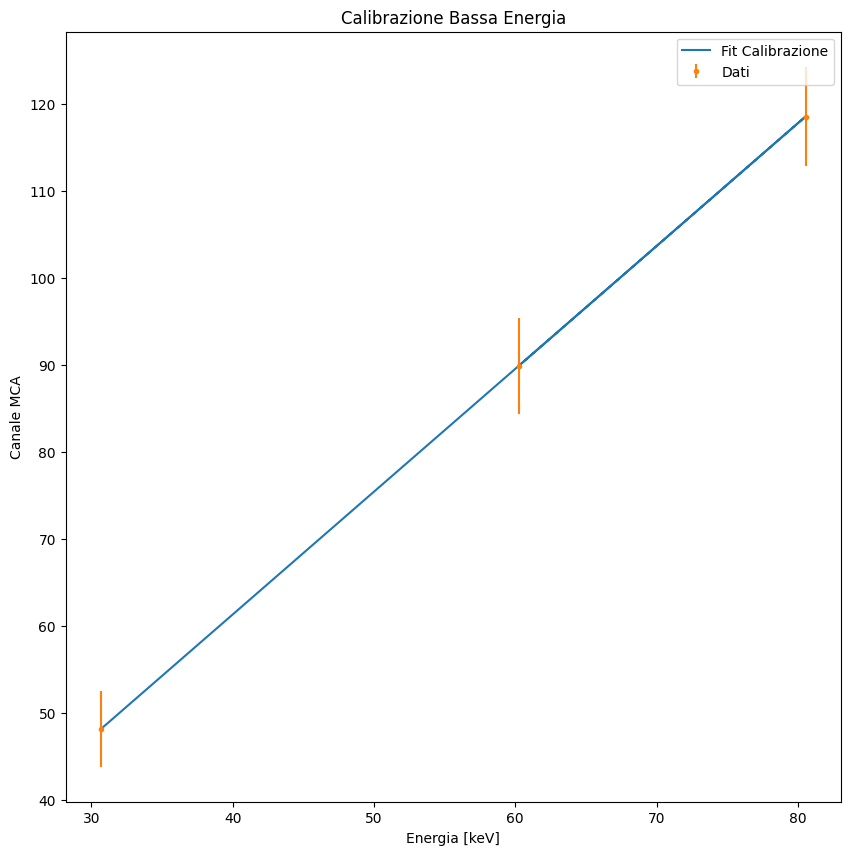

Chi-squared: 0.03
Reduced chi-squared: 0.03
Errore Energia Calibrata:   [60.26539483 80.53585502 30.68875011]
Errore Energia Calibrata:   [3.91003188 4.05449265 3.07503798]
[ 0.70846366 -3.44275222]
[0.01884187 1.70127996]


In [238]:

En=np.array([E[0],E[6],E[7]])

E_id=np.array([59.5,80.99,31])

sn=np.array([s[0],s[6],s[7]])
def linear(x,m,q):
    return m*x+q




poptl,covt=curve_fit(linear,En,E_id,absolute_sigma=False) 

plt.title('Calibrazione Bassa Energia')

plt.plot(linear(En,*poptl),En,label='Fit Calibrazione')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Canale MCA')

plt.errorbar(linear(En,*poptl),En,yerr=sn,fmt='.',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = E_id - linear(En,*poptl)
chi2 = np.sum((residuals / sn) ** 2)
dof = len(En) - len(poptl)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Errore Energia Calibrata:  ',linear(En,*poptl))
print('Errore Energia Calibrata:  ',sn*poptl[0])

#
#print('Errore Risoluzione : ',errRes)
residuals = (E_id - linear(En, *poptl)) / linear(En, *poptl)

print(poptl)
print(np.sqrt(np.diag(covt)))

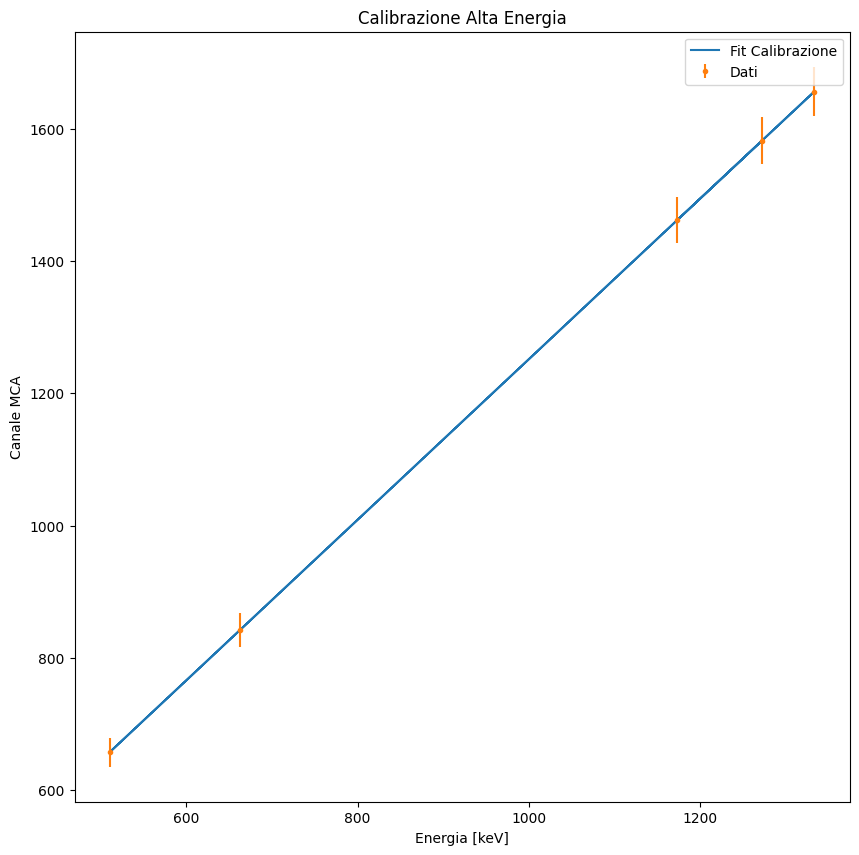

Chi-squared: 0.01
Reduced chi-squared: 0.00
Energia Calibrata :  [1173.60323999 1333.83826011  662.39560703  510.46619485 1272.59669802]
Errore Energia Calibrata:   [28.5770189  30.99136953 21.04113091 18.19149496 29.04735429]
[  0.82467146 -31.85139431]
[1.61605987e-03 2.10985189e+00]


In [239]:
Ea=np.array([E[1],E[2],E[3],E[4],E[5]])

E_id=[1173.2,1332.5,661.66,511,1274.54]

sa=np.array([s[1],s[2],s[3],s[4],s[5]])

popth,covt=curve_fit(linear,Ea,E_id,absolute_sigma=False)


plt.title('Calibrazione Alta Energia') 

plt.plot(linear(Ea,*popth),Ea,label='Fit Calibrazione')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Canale MCA')

plt.errorbar(linear(Ea,*popth),Ea,yerr=sa,fmt='.',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = E_id - linear(Ea,*popth)
chi2 = np.sum((residuals / sa) ** 2)
dof = len(Ea) - len(popth)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',linear(Ea,*popth))

#print('Errore Energia Calibrata:  ',R_E*linear(E,*popth))
#
#print('Errore Risoluzione : ',errRes)
residuals = (E_id - linear(Ea, *popth)) / linear(Ea, *popth)
print('Errore Energia Calibrata:  ',sa*popth[0])


print(popth)
print(np.sqrt(np.diag(covt)))


2749.165536414915


/tmp/ipykernel_64124/3661119390.py:9: RuntimeWarning: invalid value encountered in sqrt
  return a*np.sqrt(d/x)+b


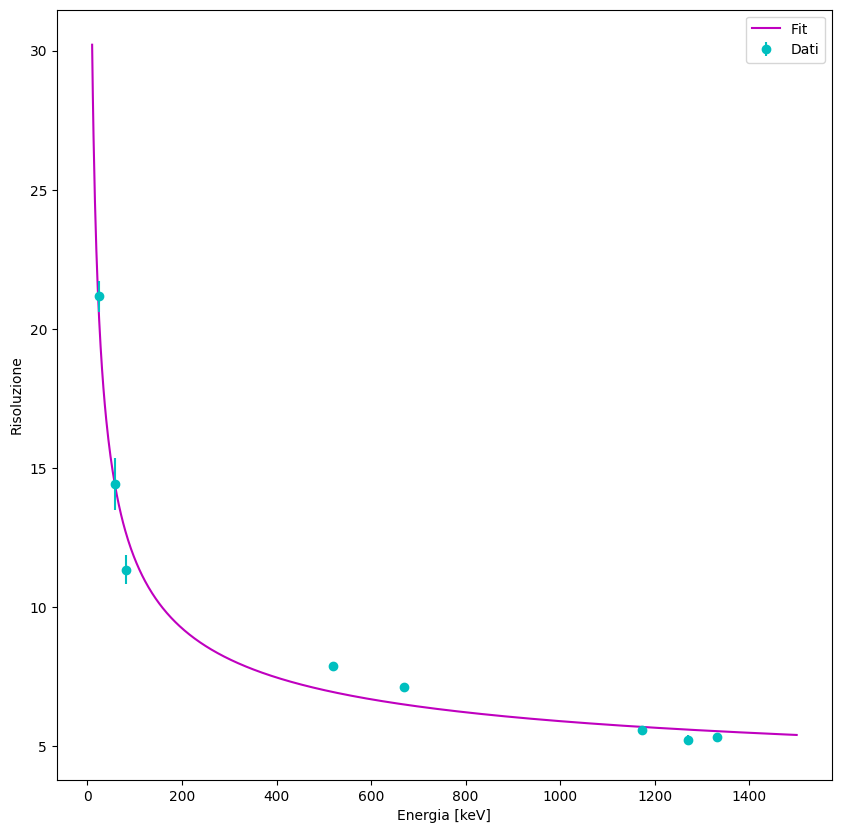

Chi-squared: 17816.52
Reduced chi-squared: 3563.30
Energia Calibrata :  [14.43178068  5.69909005  5.546418    6.50734495  6.95337004  5.60139849
 12.68761701 20.65561271]


In [240]:



R_B=100*2.35*(s/E)
errR_B=(100*2.35*np.sqrt((ds/E)**2 + (s*dE/E**2)**2)- 2*s/E**3*cov12)
E_id=linear(E,*popt1)




def funcris(x,a,b,d):
    return a*np.sqrt(d/x)+b


popt2,covt=curve_fit(funcris,E_id,R_B,absolute_sigma=True)
print(popt2[2]/0.00762)
 

x=np.linspace(10,1500,1000)

plt.plot(x,funcris(x,*popt2),label='Fit ',color='m')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Risoluzione')

plt.errorbar(E_id,R_B,yerr=errR_B*7,fmt='o',label='Dati',color='c')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = R_B - funcris(E_id,*popt2)
chi2 = np.sum((residuals / errR_B) ** 2)
dof = len(E_id) - len(popt2)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',funcris(E_id,*popt2))



[  60.26539483 1173.60323999 1333.83826011  662.39560703  510.46619485
 1272.59669802   80.53585502   30.68875011]


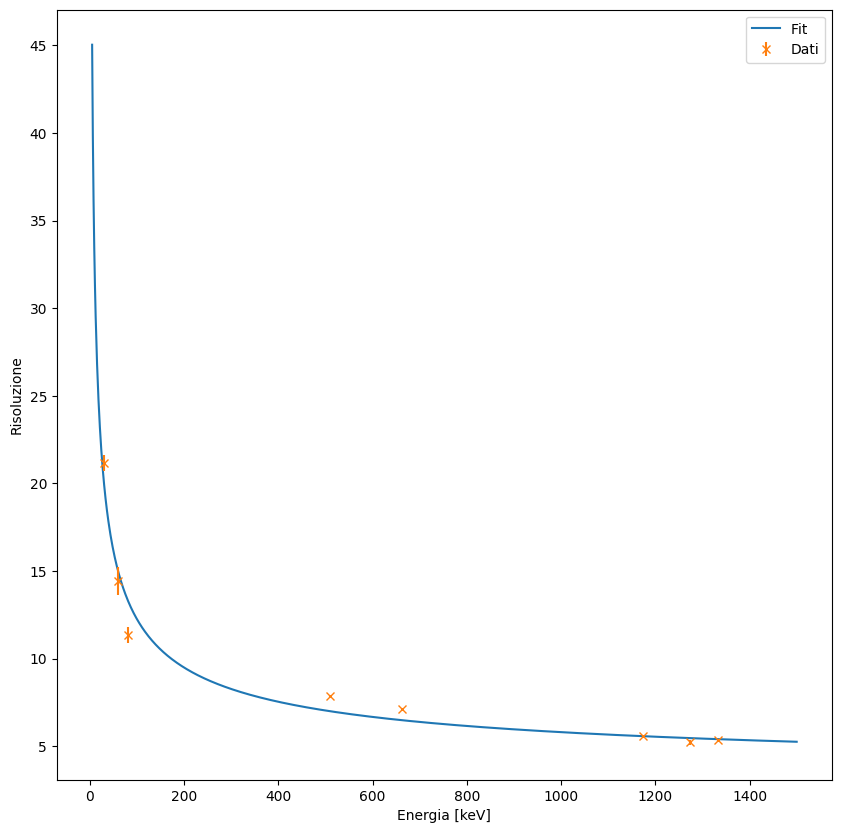

[-5.53980389e-01 -4.87908049e-04 -6.78577980e-02  6.38468773e-01
  8.88587696e-01 -2.29179618e-01 -1.98988337e+00  1.31433251e+00]
Chi-squared: 18229.69
Reduced chi-squared: 3038.28
Energia Calibrata :  [14.97690012  5.57149759  5.40067394  6.48387494  6.9942496   5.46214235
 13.33569875 19.857719  ]


In [241]:
Ea=linear(Ea,*popth) 
En=linear(En,*poptl)


errR_B=(100*2.35*np.sqrt((ds/E)**2 + (s*dE/E**2)**2)- 2*s/E**3*cov12)




Eris=np.array([En[0],Ea[0],Ea[1],Ea[2],Ea[3],Ea[4],En[1],En[2]])
print(Eris)

def funcris(x,a,b):
    return a/np.sqrt(x)+b

popt3,covt=curve_fit(funcris,Eris,R_B,absolute_sigma=False) 

x=np.linspace(5,1500,1000)

plt.plot(x,funcris(x,*popt3),label='Fit ')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Risoluzione')

plt.errorbar(Eris,R_B,yerr=errR_B*6,fmt='x',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = R_B - funcris(Eris,*popt3)
print(residuals)
chi2 = np.sum((residuals / errR_B) ** 2)
dof = len(Eris) - len(popt3)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',funcris(Eris,*popt3))